In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from types import SimpleNamespace
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))
import config

figure_path = Path('..') / 'figures'

sns.set(style='ticks', context='talk')
palette = LinearSegmentedColormap.from_list('c', [config.colors['ER'],
                                                  '#47719f',
                                                  config.colors['1C'],
                                                  '#37a96e'
                                                  ], N=4)
plt.rcParams["font.family"] = "Avenir"

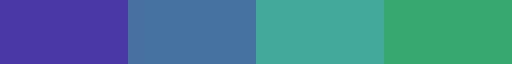

In [62]:
palette

<ipython-input-75-c0314fcd3fb5>:79: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(figure_path / 'SAS_calibration.pdf', dpi=300, bbox_inches='tight')
<ipython-input-75-c0314fcd3fb5>:79: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(figure_path / 'SAS_calibration.pdf', dpi=300, bbox_inches='tight')
/home/rgutzen/anaconda3/envs/v4a-waves/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


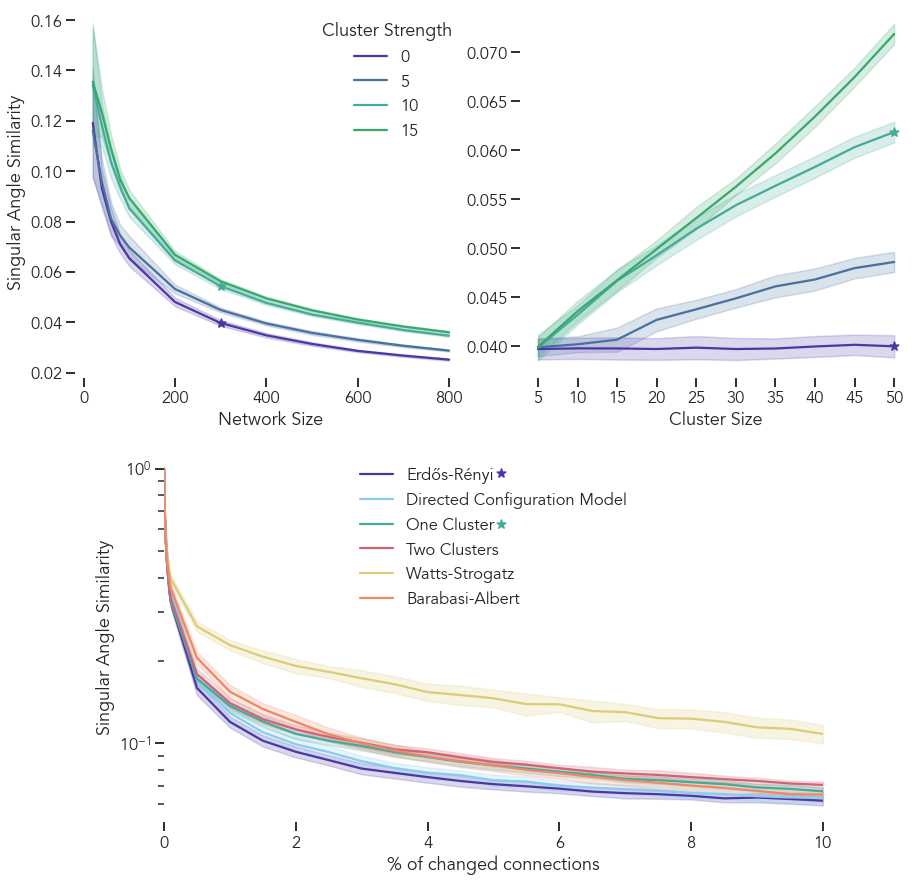

In [75]:
mosaic = """
         AAAAABBBBB
         .CCCCCCCC.
         """
fig = plt.figure(figsize=(15, 15), layout="constrained")
ax = fig.subplot_mosaic(mosaic, gridspec_kw=dict(hspace=.2, wspace=1.5))
ax = SimpleNamespace(**ax)

# PANEL A: Scan Network Size
df = pd.read_csv(Path('../scores/scan_network_size.csv'))
plot_df = df[df.cluster_size.isin([config.default_cluster_size]) \
           & df.cluster_mean.isin(config.cluster_mean) \
           & df.N.isin(config.N)]
plot_df.cluster_mean = plot_df.cluster_mean.astype(int)

sns.lineplot(data=plot_df, x="N", y="score", hue='cluster_mean', 
             estimator=np.mean, errorbar=('sd'), palette=palette, ax=ax.A)

OC_score = df[(df.N == config.default_N) & (df.cluster_mean == config.default_cluster_mean)].score.mean()
ER_score = df[(df.N == config.default_N) & (df.cluster_mean == 0)] .score.mean()
ax.A.scatter([config.default_N],[OC_score], marker='*', color=config.colors['1C'])
ax.A.scatter([config.default_N],[ER_score], marker='*', color=config.colors['ER'])

ax.A.set_ylabel('Singular Angle Similarity')
ax.A.set_xlabel('Network Size')
# ax.A.set_xticks(plot_df.N.unique())
ax.A.legend(title="Cluster Strength", frameon=False, loc='upper right')
sns.despine(ax=ax.A, left=True, bottom=True)


# PANEL B: Scan Cluster Size
df = pd.read_csv(Path('../scores/scan_cluster_size.csv'))
plot_df = df[df.cluster_size.isin(config.cluster_size) \
           & df.cluster_mean.isin(config.cluster_mean) \
           & df.N.isin([config.default_N])]
plot_df.cluster_mean = plot_df.cluster_mean.astype(int)

sns.lineplot(data=plot_df, x="cluster_size", y="score", hue="cluster_mean", 
             estimator=np.mean, errorbar=('sd'), palette=palette, ax=ax.B)

OC_score = df[(df.cluster_size == 50) & (df.cluster_mean == config.default_cluster_mean)].score.mean()
ER_score = df[(df.cluster_size == 50) & (df.cluster_mean == 0)] .score.mean()
ax.B.scatter([50],[OC_score], marker='*', color=config.colors['1C'])
ax.B.scatter([50],[ER_score], marker='*', color=config.colors['ER'])

ax.B.set_ylabel('')
ax.B.set_xlabel("Cluster Size")
ax.B.set_xticks(plot_df.cluster_size.unique())
# ax.B.legend(title="Cluster Strength", frameon=False, loc='upper center')
ax.B.get_legend().remove()
sns.despine(ax=ax.B, left=True, bottom=True)


# PANEL C: Scan Model Perturbation
N = config.default_N
df = pd.read_csv(Path(f'../scores/scan_model_perturbation_{N}x{N}.csv'))
df['percentage_change'] = df.apply(lambda row: row.num_changes / (row.N*row.M) *100, axis=1)
df['model_title'] = df.apply(lambda row: config.titles[row.model], axis=1)

sns.lineplot(data=df, x="percentage_change", y="score", hue='model', 
             estimator=np.mean, errorbar=('sd'), palette=config.colors, ax=ax.C)
ax.C.scatter([5.12],[0.626], marker='*', color=config.colors['1C'])
ax.C.scatter([5.12],[0.96], marker='*', color=config.colors['ER'])

ax.C.set_ylabel('Singular Angle Similarity')
ax.C.set_xlabel('% of changed connections')
ax.C.set_xlim((0,10))
# ax.A.set_xticks(plot_df.percentage_change.unique())
ax.C.set_yscale('log')
sns.despine(ax=ax.C, left=True, bottom=True)


h, l = ax.C.get_legend_handles_labels()
ax.C.legend(handles=h, labels=[config.titles[label] for label in l],
          frameon=False, loc='upper center')

fig.align_labels()

plt.savefig(figure_path / 'SAS_calibration.pdf', dpi=300, bbox_inches='tight')